演示如何调用API检测是否换脸

In [1]:
%matplotlib inline
import requests
import cv2
import glob
import matplotlib.pyplot as plt

根据返回的假脸的坐标绘制位置

In [2]:
def draw_face(path,face_list=[],p=0.2):
    
    img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    
    for i in range(len(face_list)):
        score=face_list[i]["score"]
        
        #print(score)
            
        if float(score) <= p:
            left=int(face_list[i]["location"]["left"]) 
            top=int(face_list[i]["location"]["top"])
            width=int(face_list[i]["location"]["width"])
            height=int(face_list[i]["location"]["height"])
            
            cv2.rectangle(img, (left,top), (left+width,top+height), (0,255,0), 4)
    
    #不保存 仅展现
    #cv2.imwrite(path, img)
    plt.imshow(img)
    plt.show()

In [3]:
def deepfakes_detect_by_img(path):
    url="http://gwgp-h9xcyrmorux.n.bdcloudapi.com/rest/deepfakes/v1/detect"
    
    files={"file":( path, open(path,"rb") ,"image/jpeg",{})}
     
    res=requests.request("POST",url, data={"type":1}, files=files)
    
    face_num=0
    face_list=[]
    
    #print(res.text)
    
    try:
    
        face_num=res.json()["face_num"]

        if face_num > 0:
            face_list=res.json()["face_list"]
            draw_face(path,face_list,p=0.2)
            
    except:
        face_num=0
        face_list=[]
    
    return face_num,face_list


{"face_num": 2, "face_list": [{"location": {"left": 423.94370625913143, "height": 84.85244235023856, "width": 60.09318847954273, "top": 379.032901417464}, "score": "0.088"}, {"location": {"left": 414.5702254921198, "height": 79.37346039712429, "width": 53.810380294919014, "top": 55.95319737493992}, "score": "0.800"}], "err_msg": "success", "err_code": 0}


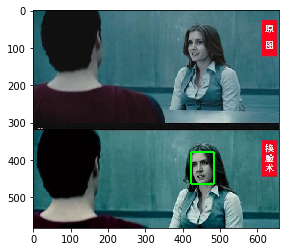

检测图片demo/deepfake01.png，其中检测到人脸2个，疑似假脸1个
{"face_num": 2, "face_list": [{"location": {"left": 196.14147948473692, "height": 139.97384678572416, "width": 106.20966563373804, "top": 365.3420629501343}, "score": "0.009"}, {"location": {"left": 191.92840851843357, "height": 137.87661648914218, "width": 104.50511162728071, "top": 62.91457323729992}, "score": "0.972"}], "err_msg": "success", "err_code": 0}


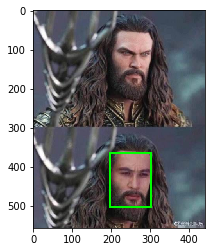

检测图片demo/deepfake03.png，其中检测到人脸2个，疑似假脸1个
{"face_num": 1, "face_list": [{"location": {"left": 167.78782383352518, "height": 127.82364422082901, "width": 101.42231187224388, "top": 52.42088985443115}, "score": "0.000"}], "err_msg": "success", "err_code": 0}


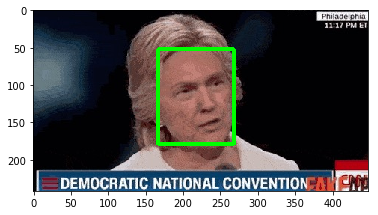

检测图片demo/deepfake02.png，其中检测到人脸1个，疑似假脸1个


In [4]:
for filename in glob.glob("demo/deepfake*"):
    
    face_num,face_list=deepfakes_detect_by_img(filename)
    
    deepfakes=0
        
    for i in range(face_num):
        score=face_list[i]["score"]

        #score小于0.2的认为是假脸
        if float(score) <= 0.2:
            deepfakes+=1
      
    
    print("检测图片{}，其中检测到人脸{}个，疑似假脸{}个".format(filename,face_num,deepfakes))